# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####

import os

working_dir = '/content/drive/My Drive/Colab Notebooks/Advance Computer Vision/Face_Recognition'
os.chdir(working_dir)

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
import zipfile

In [0]:
zip_file_dir = working_dir+'/Aligned Face Dataset from Pinterest.zip'

In [86]:
#### Add your code here ####

extracted = zipfile.ZipFile(zip_file_dir, 'r')
extracted.extractall(path=working_dir)

!ls

'Aligned Face Dataset from Pinterest.zip'   pins   vgg_face_weights.h5
'Face recognition - Project.ipynb'	    PINS


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [88]:
# checking content of metadata with few indexes
metadata[[0,200,1000]]

array([PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,
       PINS/pins_Amanda Crew/Amanda Crew120.jpg,
       PINS/pins_Caity Lotz/Caity Lotz28.jpg], dtype=object)

In [89]:
print(metadata[200].base)
print(metadata[200].name)
print(metadata[200].file)

PINS
pins_Amanda Crew
Amanda Crew120.jpg


### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

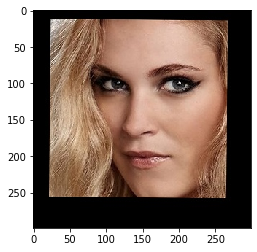

In [9]:
#### Add your code here ####

img1 = load_image(metadata[200].image_path())

plt.imshow(img1)


### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
#### Add your code here ####
model = vgg_face()

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)    

In [0]:
weight_file = 'vgg_face_weights.h5'

model.load_weights(weight_file)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
metadata.shape

(10770,)

In [15]:
#### Add your code here ####

# The following code takes too long to run
# Therefore, I have restrict it to 500 only out of 2622 to demonstrate it as part of the project

embeddings = []
embeddings = np.zeros((metadata.shape[0], 2622))

# for i in range(len(metadata)):
for i, m in enumerate(metadata):
  try:
    # img_path = metadata[i].image_path()
    img_path = m.image_path()
    img = load_image(img_path)
    img = (img/255.).astype(np.float32)
    img = cv2.resize(img, dsize=(224,224))

    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  except:
    print(i, m)

print(embeddings[300])



[ 0.00777526  0.00555415 -0.00359127 ... -0.03101214  0.00883558
  0.03514312]


In [16]:
embeddings[99]

array([ 0.02439969,  0.00013587, -0.00848603, ...,  0.00391556,
       -0.01952044, -0.00155188])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

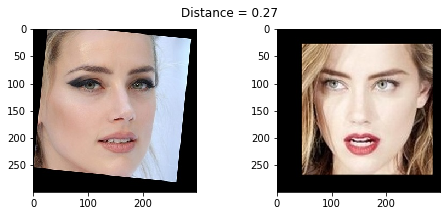

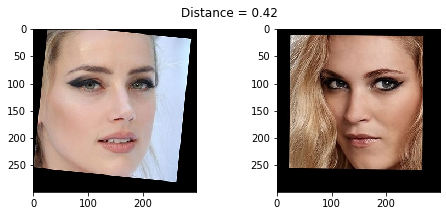

In [18]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(0, 3)
show_pair(0, 200)

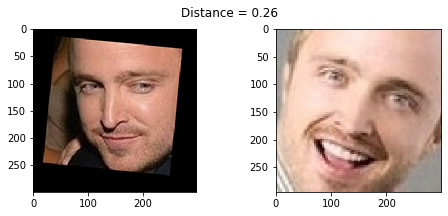

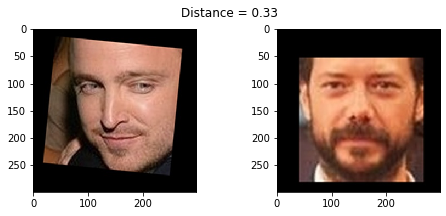

In [102]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])

y_train = targets[train_idx]
y_test = targets[test_idx]

In [40]:
print(metadata.shape)
print(train_idx.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10111,)
(10111,)
(8987, 2622)
(8987,)
(1124, 2622)
(1124,)


### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
le = LabelEncoder()

In [0]:
y = le.fit_transform(targets)

In [0]:
# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)

y_train = y[train_idx]
y_test = y[test_idx]

In [44]:
y_train[1]

0

In [45]:
print(y_train.shape)
print(y_test.shape)

(8987,)
(1124,)


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
ss = StandardScaler()

In [0]:
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

#### Add your code here ####

In [25]:
cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00011128 -0.32325588 -0.28371353 ... -0.41628888  0.00601085
   0.80578849]
 [-0.32325588  1.00011128  0.61335513 ...  0.29311922  0.19502885
  -0.29457911]
 [-0.28371353  0.61335513  1.00011128 ...  0.05517655  0.18758041
  -0.20514334]
 ...
 [-0.41628888  0.29311922  0.05517655 ...  1.00011128 -0.0292595
  -0.52994946]
 [ 0.00601085  0.19502885  0.18758041 ... -0.0292595   1.00011128
   0.06854411]
 [ 0.80578849 -0.29457911 -0.20514334 ... -0.52994946  0.06854411
   1.00011128]]


In [26]:
X_train_std.shape

(8987, 2622)

In [0]:
pca = PCA().fit(X_train_std)

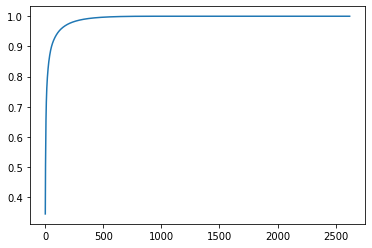

In [114]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [0]:
pca1 = PCA(n_components=150)
pca1.fit(X_train_std)

X_train_s = pca1.transform(X_train_std)
X_test_s = pca1.transform(X_test_std)

In [50]:
print(X_train_s.shape)
print(X_test_s.shape)

(8987, 150)
(1124, 150)


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC

#### Add your code here ####

In [0]:
svm_model = SVC(C=0.01, kernel='linear')

In [29]:
# svm_model.fit(X_train_std, y_train[0:9573])
svm_model.fit(X_train_s, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn.metrics import accuracy_score

In [31]:
accu = accuracy_score(y_test, svm_model.predict(X_test_s))

print(f'SVM accuracy = {accu}')

SVM accuracy = 0.98


In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
# scores = cross_val_score(svm_model, X_test_s, y_test, cv=10)

# print(scores)

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

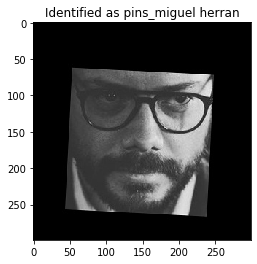

In [60]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
test = [embeddings[test_idx][example_idx]]
test = pca1.transform(test)
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svm_model.predict(test)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

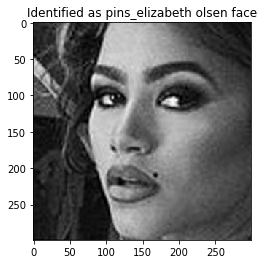

In [35]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 49
temp = [embeddings[test_idx][example_idx]]
temp = pca1.transform(temp)
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svm_model.predict(temp)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');